 ╔══════════════<i><b>&nbsp; - EDA - &nbsp;</b></i>════════════════════════════╗
# EDA & Modeling
## 2015 ~ 2017 중고 핸드폰 거래가격 EDA
<br>

#### js-lee AI

<br>

### _Objective_
<br>
1. 데이터를 전처리한다. (결측치가 없는 데이터)
<br>
2. 전처리한 데이터를 통해 유의미한 변수간 상관관계를 분석한다.
<br>
3. 분석한 상관관계를 통해 예측 회귀 모델을 만들고 성능 평가를 진행한다.
<br>
4. Test data를 예측한 것을 시각화한다.
<br>

╚═══════════════════════════════════════════════╝

### 필요 _Library_

1. Numpy
2. Pandas
3. Matplotlib
4. Seaborn
5. Scikit-learn


In [1]:
# 나눔 폰트 다운
!apt-get update -qq
!apt-get install fonts-nanum* -qq

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


### 필요 Library Import & Setting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.font_manager as fm

# 나눔 폰트의 위치 가져오기 
system_font = fm.findSystemFonts() # 현재 시스템에 설치된 폰트
nanum_fonts = [font for font in system_font if "NanumBarunGothic.ttf" in font]
font_path = nanum_fonts[0] # 설정할 폰트의 경로

# 나눔 폰트로 설정하기
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font",family=font_name)

# 폰트 재설정하기
fm._rebuild()

# minus 기호 깨짐 방지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

### [중고나라 데이터셋 살펴보기]

In [4]:
# 데이터셋 load
df = pd.read_csv('중고나라.csv', encoding='utf-8')
df.head()

,Unnamed: 0,price_index,제조일,가격,판매글,기종,브랜드,출고가
0,0,95.96,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,apple,924000
1,1,103.05,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,samsung,979000
2,2,103.05,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,samsung,854000
3,3,95.96,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,lg,836000
4,4,102.59,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,lg,396000


In [5]:
# Features 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4951 non-null   int64  
 1   price_index  4951 non-null   float64
 2   제조일          4951 non-null   object 
 3   가격           4951 non-null   float64
 4   판매글          4951 non-null   object 
 5   기종           4951 non-null   object 
 6   브랜드          4951 non-null   object 
 7   출고가          4951 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 309.6+ KB


#### 결측치 데이터 개수 확인

In [6]:
df.isnull().sum()

# 결측치(NaN) 데이터가 없으므로, 결측치 처리를 하지 않음. 

Unnamed: 0     0
price_index    0
제조일            0
가격             0
판매글            0
기종             0
브랜드            0
출고가            0
dtype: int64

#### unamed: 0 컬럼은 기존 index와 동일하므로 해당 컬럼 삭제

In [7]:
del df['Unnamed: 0']
df.head()

,price_index,제조일,가격,판매글,기종,브랜드,출고가
0,95.96,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,apple,924000
1,103.05,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,samsung,979000
2,103.05,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,samsung,854000
3,95.96,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,lg,836000
4,102.59,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,lg,396000


### 변수 분리
#### '기종' Column에서 메모리 부분과 모델명 부분 나누기

In [8]:
# phone_model 피처에서 저장 용량(phone_model_storage) 피처를 추출합니다.
df['메모리'] = df['기종'].apply(lambda x: x.split(" ")[-1])

# phone_model 피처에서 기종 세부명(phone_model_detail) 피처를 추출합니다.
df['모델명'] = df['기종'].apply(lambda x: ' '.join(x.split(" ")[:-1]))

del df['기종']

df.head()

,price_index,제조일,가격,판매글,브랜드,출고가,메모리,모델명
0,95.96,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,apple,924000,64gb,iphone 6
1,103.05,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,samsung,979000,32gb,galaxy s6 edge
2,103.05,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,samsung,854000,32gb,galaxy s6
3,95.96,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg,836000,32gb,lg g5
4,102.59,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg,396000,32gb,lg u


### 변수 탐색이 까다로운 Column 삭제
#### '판매글' Column 삭제

In [9]:
del df['판매글']
df.head()

,price_index,제조일,가격,브랜드,출고가,메모리,모델명
0,95.96,2017-03-19 4 35 00 PM,550000.0,apple,924000,64gb,iphone 6
1,103.05,2016-10-26 12 08 00 PM,380000.0,samsung,979000,32gb,galaxy s6 edge
2,103.05,2016-10-25 12 52 00 PM,300000.0,samsung,854000,32gb,galaxy s6
3,95.96,2017-03-23 11 14 00 PM,290000.0,lg,836000,32gb,lg g5
4,102.59,2016-04-11 7 35 00 PM,280000.0,lg,396000,32gb,lg u


### [각 feature 변수 탐색]

### _제조일_ &nbsp; 컬럼 탐색
<br>

####  '제조일' &nbsp; 컬럼으로 부터  '월' 컬럼을 추출하여 feature 생성
- 생성된 feature과 target 변수인 '가격'과의 상관관계 분석

In [10]:
# '월' 을 의미하는 정보를 featrue로 추출
df['월'] = df['제조일'].apply(lambda x: x[:7])
df.head()

,price_index,제조일,가격,브랜드,출고가,메모리,모델명,월
0,95.96,2017-03-19 4 35 00 PM,550000.0,apple,924000,64gb,iphone 6,2017-03
1,103.05,2016-10-26 12 08 00 PM,380000.0,samsung,979000,32gb,galaxy s6 edge,2016-10
2,103.05,2016-10-25 12 52 00 PM,300000.0,samsung,854000,32gb,galaxy s6,2016-10
3,95.96,2017-03-23 11 14 00 PM,290000.0,lg,836000,32gb,lg g5,2017-03
4,102.59,2016-04-11 7 35 00 PM,280000.0,lg,396000,32gb,lg u,2016-04


In [11]:
# 월별 거래 횟수 출력.
df['월'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: 월, dtype: int64

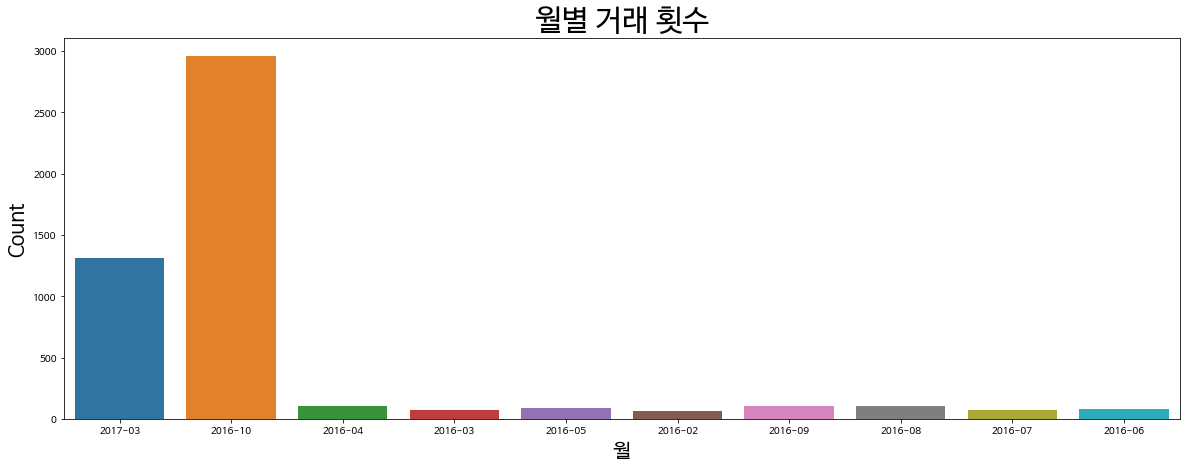

In [12]:
# 월별 거래 횟수를 그래프로 출력
plt.figure(figsize=(20,7))
sns.countplot(df['월'], data=df)

plt.ylabel('Count', fontdict = {'fontsize' : 20})
plt.xlabel('월', fontdict = {'fontsize' : 20})
plt.title('월별 거래 횟수', fontdict = {'fontsize' : 30});

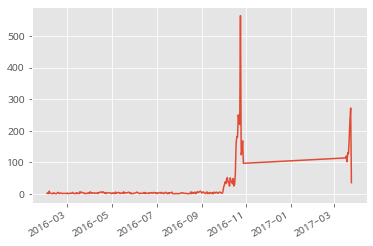

In [13]:
plt.style.use('ggplot')
df_day = pd.to_datetime(df['제조일'].apply(lambda x: x[:10])).value_counts()
df_day.plot()

``얻은 고찰 : 
1 - 월별 거래 횟수는 전반적으로 비슷하지만 2016-10, 2017-03에 높은 비중으로 몰려있다.
즉, 매 월마다 큰 편차를 보인다.
2 - 제조일에 따른 거래량 또한 2016-10과 2017-03 이후로 거래량이 증가한다``
- 위의 1, 2를 토대로 두 변수의 상관관계가 깊을 것이라고 예상할 수 있다.

-----

#### '가격' feature 탐색

- z-score를 통해 해당 데이터의 '가격'이 '기종'별 평균에 비해 어느정도로 높거나 낮은지를 탐색
<br>

 ![z-score](img/0.jpg)
 
 출처 : http://www.ltcconline.net/greenl/courses/201/probdist/zScore.htm



Text(0.5, 1.0, '가격 컬럼의 분포')

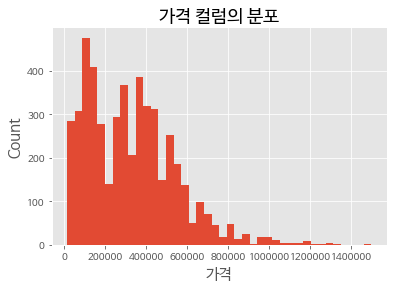

In [14]:
# 가격의 분포를 그래프로 분석
df['가격'].hist(bins=40)
plt.xlabel('가격', fontdict={'fontsize' : 15})
plt.ylabel('Count', fontdict={'fontsize' : 15})
plt.title('가격 컬럼의 분포', fontdict={'fontsize' : 18})

In [15]:
# '모델명'별 '가격'의 평균 계산
df_md_mean = df.groupby('모델명')['가격'].transform(lambda x: np.mean(x))

df_md_mean

0       411869.960164
1       304179.104478
2       255546.448087
3       330074.545455
4       127935.416667
            ...      
4946    844621.810127
4947    812021.739130
4948    812021.739130
4949    844621.810127
4950    812021.739130
Name: 가격, Length: 4951, dtype: float64

In [16]:
# '모델명'별 가격'의 표준편차 계산
df_md_std = df.groupby('모델명')['가격'].transform(lambda x: np.std(x))

df_md_std

0       151652.968915
1        74975.603071
2        66264.305815
3       120779.331875
4       149124.347567
            ...      
4946    222010.066597
4947    219346.772882
4948    219346.772882
4949    222010.066597
4950    219346.772882
Name: 가격, Length: 4951, dtype: float64

Text(0.5, 1.0, '(모델명에 따른 가격)\nZ-Score')

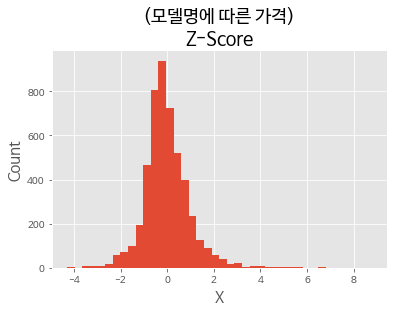

In [17]:
# 위에서 구한 평균과 표준편차를 바탕으로 데이터의 z-score 계산 

z_score = (df['가격'] - df_md_mean) / df_md_std

z_score.hist(bins = 40)
plt.xlabel('X', fontdict={'fontsize' : 15})
plt.ylabel('Count', fontdict={'fontsize' : 15})
plt.title('(모델명에 따른 가격)\nZ-Score', fontdict={'fontsize' : 18})

In [18]:
# '메모리'별 '가격'의 평균 계산
df_memory_mean = df.groupby('메모리')['가격'].transform(lambda x: np.mean(x))

# '메모리'별 '가격'의 표준편차 계산
df_memory_std = df.groupby('메모리')['가격'].transform(lambda x: np.std(x))


Text(0.5, 1.0, '(메모리에 따른 가격)\nZ-Score')

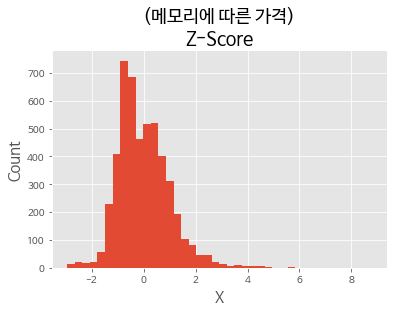

In [19]:
# 위에서 구한 평균과 표준편차를 바탕으로 데이터의 z-score 계산 

z_score = (df['가격'] - df_memory_mean) / df_memory_std

z_score.hist(bins = 40)
plt.xlabel('X', fontdict={'fontsize' : 15})
plt.ylabel('Count', fontdict={'fontsize' : 15})
plt.title('(메모리에 따른 가격)\nZ-Score', fontdict={'fontsize' : 18})

``얻은 고찰 : 
1 - 모델명에 따라 가격 컬럼 값이 많이 달라짐
2 - 메모리에 따라 가격 컬럼 값이 많이 달라짐``

-----

#### '출고가' feature 탐색

Text(0.5, 1.0, '출고가 분포')

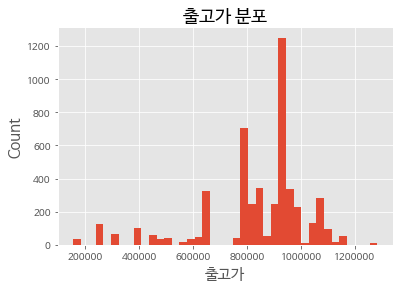

In [20]:
# 출고가 컬럼의 histogram 출력

df['출고가'].hist(bins=40)
plt.xlabel('출고가', fontdict={'fontsize' : 15})
plt.ylabel('Count', fontdict={'fontsize' : 15})
plt.title('출고가 분포', fontdict={'fontsize' : 18})

Text(0.5, 1.0, '가격/출고가/모델명에 따른 Scatter plot')

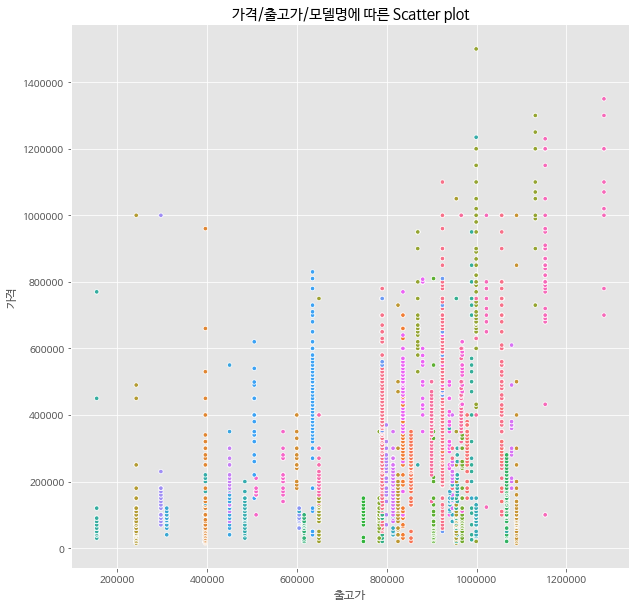

In [21]:
# 3변수 탐색
# 출고가 컬럼 / 가격 컬럼 / 기종 컬럼을 scatter로 나타내어
# 상관관계를 살펴봄

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=df['출고가'], y=df['가격'], hue=df['모델명'], s=20)
ax.legend_.remove()
plt.title('가격/출고가/모델명에 따른 Scatter plot')

`` # 얻은 고찰 : 
1) 출고가는 대부분 100만원 대에 근접해 있음
2) 대부분 같은 모델명의 휴대폰은 비슷한 가격을 형성하고 있음
3) 대부분 같은 모델명의 휴대폰은 비슷한 출고가를 형성하고 있음``

-----

#### 핸드폰 모델명 Column에 따른 거래량 분석

In [22]:
# 기종별 총 거래량 집계
num_model = df['모델명'].value_counts()

num_model

iphone 6               1707
galaxy note3            255
galaxy note5            241
iphone se               240
galaxy s6               183
iphone 5s               182
iphone 7                138
wine smart jazz         128
galaxy s7               128
galaxy s7 edge          123
lg g5                   121
galaxy s4               104
lg u                     96
galaxy note 2            95
g4                       95
iphone 7 plus            79
galaxy s3 3g             73
g3 cat.6                 72
galaxy s6 edge           67
galaxy note4             61
optimus g                50
lg g2                    45
iphone 6s Plus           42
galaxy note7             41
galaxy a8 2016           40
galaxy alpha             38
xperia z3                37
iphone 5                 36
nexus 5x                 35
g pro2                   35
galaxy grand max         35
y6                       35
vega iron2               34
galaxy s6 edge plus      33
galaxy note3 neo         31
galaxy folder       

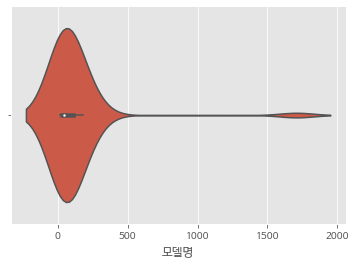

In [23]:
# 모델명별 총 거래 데이터 개수를 violin plot을 통해 살펴봄
sns.violinplot(num_model)

-----

#### 브랜드 Column에 따른 거래량 분석

In [24]:
brand = df['브랜드'].value_counts()

brand

apple      2450
samsung    1642
lg          677
pantech      57
sony         37
huawei       35
tg           28
sky          25
Name: 브랜드, dtype: int64

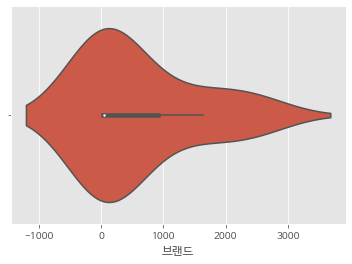

In [25]:
# 브랜드별 거래 데이터 개수를 violin plot을 통해 살펴봄
sns.violinplot(brand)

Text(0.5, 1, 'feature 상관관계')

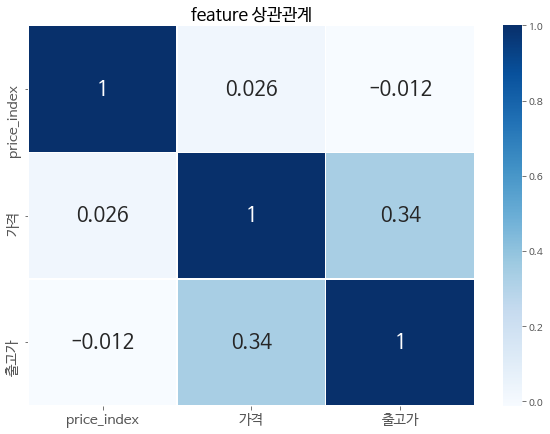

In [26]:
sns.heatmap(df.corr(), annot=True, linewidths=0.2, 
            annot_kws={'size':20}, cmap='Blues')

fig=plt.gcf()
fig.set_size_inches(10,7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('feature 상관관계', fontsize=17)

`` # 얻은 고찰
브랜드 컬럼을 통해 3개의 브랜드가 거래량의 대부분을 차지함 ``

-----

## '가격' 예측을 위한 Regression model 제작

### [Random forest regressor 사용]

- 사용할 feature은 price_index, 제조일, 가격, 모델명, 메모리, 출고가, 브랜드, 월
- n_estimators = 2000
- max_features = 'auto'
- max_depth = 10
- bootstrap = False

In [27]:
df.head()

,price_index,제조일,가격,브랜드,출고가,메모리,모델명,월
0,95.96,2017-03-19 4 35 00 PM,550000.0,apple,924000,64gb,iphone 6,2017-03
1,103.05,2016-10-26 12 08 00 PM,380000.0,samsung,979000,32gb,galaxy s6 edge,2016-10
2,103.05,2016-10-25 12 52 00 PM,300000.0,samsung,854000,32gb,galaxy s6,2016-10
3,95.96,2017-03-23 11 14 00 PM,290000.0,lg,836000,32gb,lg g5,2017-03
4,102.59,2016-04-11 7 35 00 PM,280000.0,lg,396000,32gb,lg u,2016-04


#### 학습용 테스트용 데이터로 분리

- train data : 70%
- test data : 30%

In [28]:
from sklearn.model_selection import train_test_split

# Dataset을 Train/Test 데이터로 분리
df = df[['가격', '모델명', '메모리', '출고가', '브랜드', 'price_index', '월']]
df = pd.get_dummies(df, columns=['모델명', '메모리', '브랜드', '월'])
X = df.loc[:, df.columns != '가격']
Y = df['가격']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=777)

#### 랜덤포레스트 회귀모델 학습

In [29]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 회귀 모델 training.
reg_model = RandomForestRegressor(n_estimators=2000,
                               criterion='mse',
                              max_features='auto',
                              max_depth=10,
                              bootstrap=False)
reg_model.fit(X_train, Y_train)

# train data 정확도
train_predic = reg_model.predict(X_train)
print('Train data 예측 값 : ', train_predic)

# test data 정확도
test_predic = reg_model.predict(X_test)
print('Test data 예측 값 : ', test_predic)

Train data 예측 값 :  [452115.38461539 125195.12195122 311603.44827586 ... 372242.64705884
 623333.33333334 311603.44827586]
Test data 예측 값 :  [529375.         530652.17391303 311603.44827586 ... 110903.84615385
 301250.         481666.66666665]


### 회귀 모델 성능평가
- 위에서 제작한 예측 값을 토대로 train/test 성능평가 진행
- 평가지표는 Mean Square Error, $R^2$ Square 사용

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# MSE를 통한 성능평가
print('MSE train : {:.3f}'.format(mean_squared_error(Y_train, train_predic)))
print('MSE test : {:.3f}'.format(mean_squared_error(Y_test, test_predic)))     

print()

# R-Square를 통한 성능평가
print('R-Sqaure : {:.3f}'.format(r2_score(Y_train, train_predic)))
print('R-Sqaure : {:.3f}'.format(r2_score(Y_test, test_predic))) 

MSE train : 11191607264.285
MSE test : 14030568562.098

R-Sqaure : 0.758
R-Sqaure : 0.713


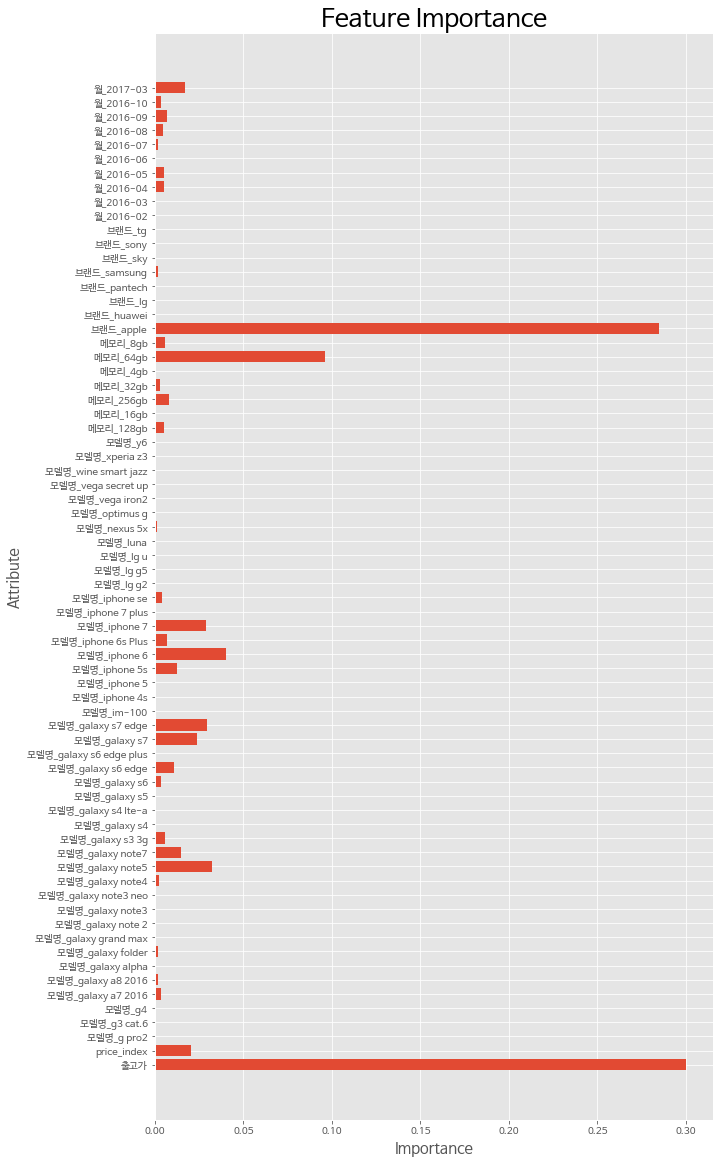

In [31]:
# 특성 중요도 시각화 하기

def plot_feature_importances(model):
    plt.figure(figsize=(10, 20))
    plt.barh(X_train.columns, model.feature_importances_, align='center')
    plt.xlabel("Importance", fontdict={'fontsize' : 15})
    plt.ylabel("Attribute", fontdict={'fontsize' : 15})
    plt.title('Feature Importance', fontdict={'fontsize' : 25})

plot_feature_importances(reg_model)

-----

### 예측 결과 시각화 (scatter plot)
#### Data points가 y=x에 근접할 수록 근접하게 예상한 것


Text(0.5, 1.0, '예측 값과 데이터 값의\n오차 시각화')

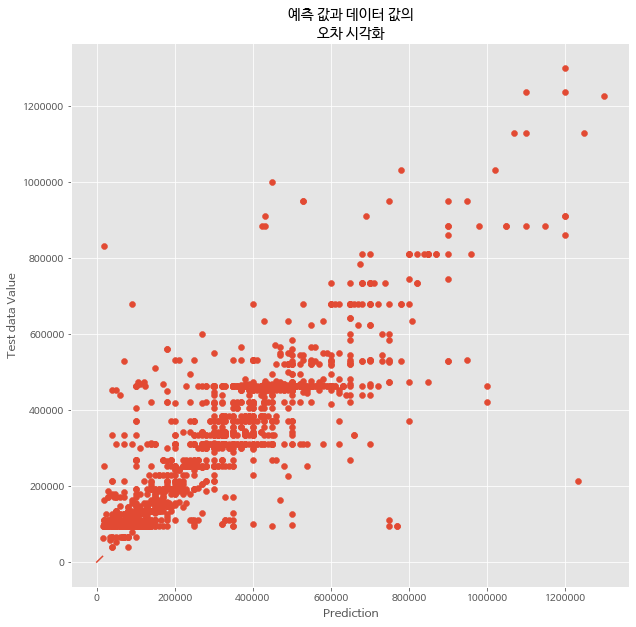

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test.values, test_predic)
plt.plot(np.arange(1,15000), np.arange(1,15000))
plt.ylabel('Test data Value')
plt.xlabel('Prediction')
plt.title('예측 값과 데이터 값의\n오차 시각화')

-----